In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


In [5]:
data_folder = r"E:\data\gst-0815-23\Mechanism_6\JointSatisfaction_across_Alpha"
alpha_list = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45]
gg_satisfaction_across_K_alpha, gs_satisfaction_across_K_alpha, ss_satisfaction_across_K_alpha, sg_satisfaction_across_K_alpha = [], [], [], []
for alpha in alpha_list:
    gg_confusion_file = data_folder + r"\gg_joint_satisfaction_across_K_alpha_{0}".format(alpha)
    gs_confusion_file = data_folder + r"\gs_joint_satisfaction_across_K_alpha_{0}".format(alpha)
    ss_confusion_file = data_folder + r"\ss_joint_satisfaction_across_K_alpha_{0}".format(alpha)
    sg_confusion_file = data_folder + r"\sg_joint_satisfaction_across_K_alpha_{0}".format(alpha)
    
    with open(gg_confusion_file, 'rb') as infile:
        gg_confusion = pickle.load(infile)
    with open(gs_confusion_file, 'rb') as infile:
        gs_confusion = pickle.load(infile)
    with open(ss_confusion_file, 'rb') as infile:
        ss_confusion = pickle.load(infile)
    with open(sg_confusion_file, 'rb') as infile:
        sg_confusion = pickle.load(infile)
        
    gg_satisfaction_across_K_alpha.append(gg_confusion)
    gs_satisfaction_across_K_alpha.append(gs_confusion)
    ss_satisfaction_across_K_alpha.append(ss_confusion)
    sg_satisfaction_across_K_alpha.append(sg_confusion)

print(np.array(gg_satisfaction_across_K_alpha).shape)


(9, 9)


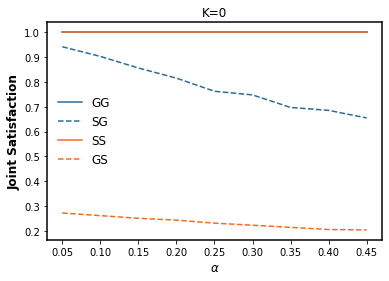

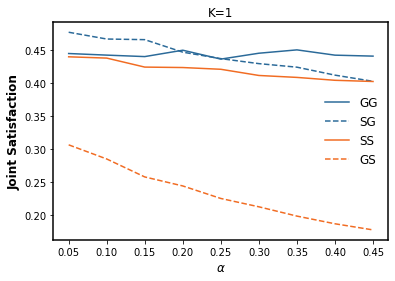

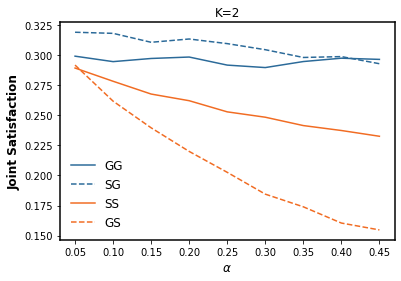

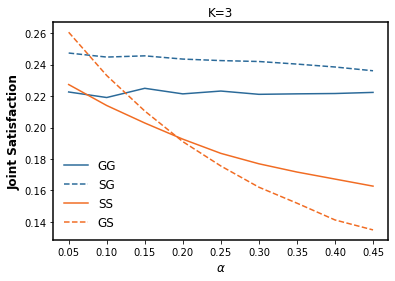

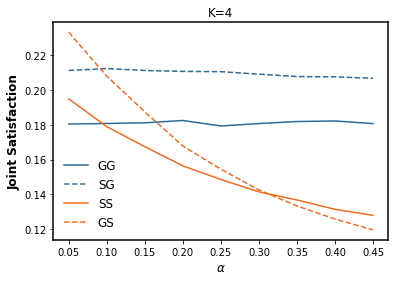

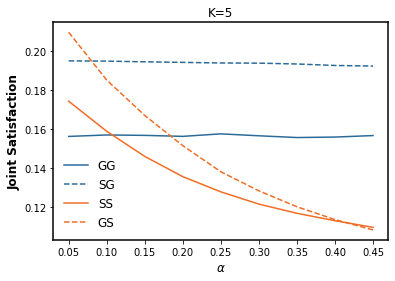

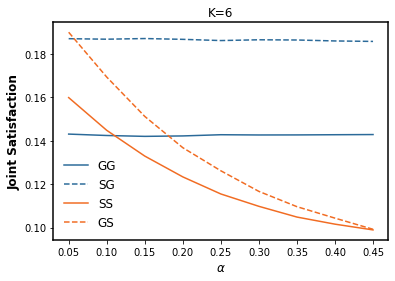

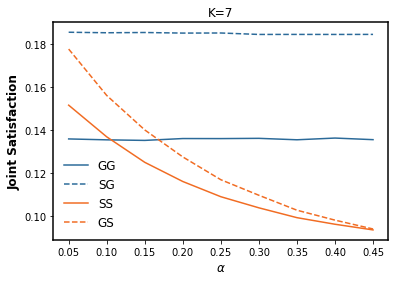

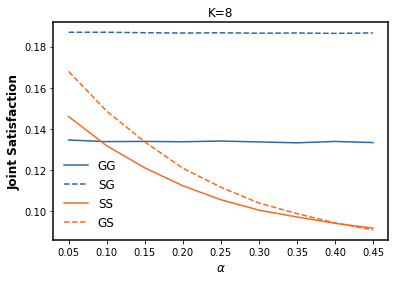

In [8]:
# GST Fitness
K_list = range(0, 9)
for K in K_list:
    gg_satisfaction_across_alpha, gs_satisfaction_across_alpha, ss_satisfaction_across_alpha, sg_satisfaction_across_alpha = [], [], [], []
    for gg_confusion, gs_confusion, ss_confusion, sg_confusion in zip(gg_satisfaction_across_K_alpha, gs_satisfaction_across_K_alpha, ss_satisfaction_across_K_alpha, sg_satisfaction_across_K_alpha):
        gg_satisfaction_across_alpha.append(gg_confusion[K])
        gs_satisfaction_across_alpha.append(gs_confusion[K])
        ss_satisfaction_across_alpha.append(ss_confusion[K])
        sg_satisfaction_across_alpha.append(sg_confusion[K])
    
    x = alpha_list
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.plot(x, gg_satisfaction_across_alpha, "-", label="GG", color=nature_blue)
    plt.plot(x, sg_satisfaction_across_alpha, "--", label="SG", color=nature_blue)
    
    plt.plot(x, ss_satisfaction_across_alpha, "-", label="SS", color=nature_orange)
    plt.plot(x, gs_satisfaction_across_alpha, "--", label="GS", color=nature_orange)
    
    plt.xlabel('$\\alpha$', fontweight='bold', fontsize=12)
    plt.ylabel('Joint Satisfaction', fontweight='bold', fontsize=12)
    plt.title("K={0}".format(K))
    plt.xticks(x)
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.savefig(data_folder + r"\Joint_Satisfaction_across_Alpha_K={0}.png".format(K), transparent=True, dpi=300)
    plt.show()